# Лабораторная работа № 2. Статистический анализ данных и построение графиков

В работе проводится обзор основных возможностей модулей **numpy** и **pandas** для статистического анализа данных, а также их визуализации с помощью модуля **matplotlib**. 

## Цель работы

Изучить основные возможности модулей **matplotlib** и **pandas** по визуальному представлению данных. Получить навык статистической обработки данных средствами модуля **pandas**.

## Модуль matplotlib

Модуль **matplotlib** является довольно мощным средством пострения различного рода графиков. Подчас работа с ним вызывает некоторые затруднения, которые вызваны некоторыми аспектами. Этот модуль действительно обширен, **matplotlib** содержит несколько разных интерфейсов (способов построения фигуры) и может взаимодействовать с большим количеством бекендов (бекенды отвечают за то, как по факту будут отображаться диаграммы, не только за внутреннюю структуру). К тому же часть собственной документации **matplotlib** серьезно устарела. Однако понимание того, как работает этот модуль позволит избежать большинства возникающих затруднений.

Всю документацию по этому модулю и примеры его использования можно найти на [официальном сайте.](https://matplotlib.org/stable/api/pyplot_summary.html "matplotlib.org")

Импортируем модуль с помощью команды **import**. Стандартное краткое обозначение - **plt**

In [1]:
import matplotlib.pyplot as plt

Следующая магическая команда (она именно так называется!) устанавливает определенный бекенд: *inline* означает, что графики будут строится непосредственно после самого кода, т.е. будут включаться в структуру кода, а *notebook* означает, что графики будут рисоваться отдельно от того кода, который их вызвал. Это может быть полезно, например, для динамического обновления графика.

In [2]:
# %matplotlib notebook
%matplotlib inline

**Matplotlib** основывается на иерархии объектов. Объект **Figure** – это внешний контейнер для графики, который может включать в себя несколько объектов **Axes**. Причиной сложности в понимании может быть название: **Axes** (оси), на самом деле, представляют собой то, что мы подразумеваем под индивидуальным графиком или диаграммой.

Можно рассматривать объект **Figure** как контейнер, содержащий один или несколько объектов **Axes** (настоящих графиков). Под объектами **Axes**, в порядке иерархии расположены меньшие объекты, такие как индивидуальные линии, отметки, легенды и текстовые боксы. Практически каждый «элемент» диаграммы – это собственный манипулируемый объект Python, вплоть до ярлыков и отметок.

![Figure object](https://python-scripts.com/wp-content/uploads/2018/03/figure-matplotlib.jpg "Figure object")

Для создания объекта **Figure** используется функция **subplots(figsize)**, на вход которой подается размер окна в виде объекта **tuple**. Возвращаемое значение - объект **Figure** и объекты **Axes**, находящиеся внутри объекта **Figure**.

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


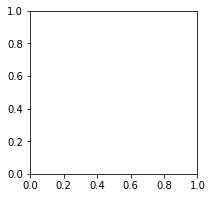

In [3]:
fig, ax = plt.subplots(figsize=(3,3))
print(type(fig))
print(type(ax))


Важно отметить, что есть два интерфейса работы с модулем **matplotlib**: структурированный (ориентированный на структуру) и неструктурированный (ориентированный на объект). Пример выше - структурированный подход. В этом подходе все команды стоит приписывать определенному объекту **Axes**, вызвать который можно с помощью команды **gca()** (get current axes). Пример ниже иллюстрирует, каким образом в рамках структурированного подхода можно построить простой график.

Обратите внимание, что график построился в окошке выше, к которому привязался объект **Axes**.

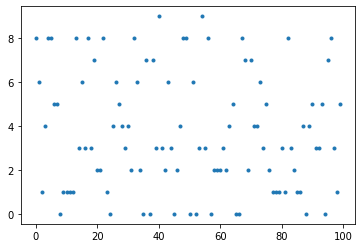

In [4]:
import numpy as np

ax = plt.gca()
ax.plot(np.arange(100), np.random.randint(0, 10, size=100), '.')

Другим подходом является неструктурированный подход. Он проще в использовании, и дальнейшем мы будем пользоваться им. В рамках этого подхода текущий объект **Axes** всегда негласно подразумевается. При функции, которая создает новый объект **Axes**, фокус внимания смещается на него. Пример ниже иллюстрирует построение простого графика в рамках неструктурированного (объектно-ориентированного) подхода.

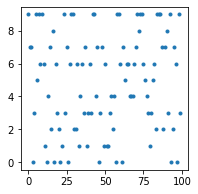

In [5]:
plt.figure(figsize = (3,3))
plt.plot(np.arange(100), np.random.randint(0, 10, size=100),'.')
plt.show()

### Линейный график

Построить линейный график можно с помощью метода **plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12, label='line1')**. Здесь *x* - массив значений по горизонтальной оси, *y* - массив значений по вертикальной оси, *color* - цвет линии, *marker* - отображение точек ('0' - круги, 'x' - кресты и др.), *linestyle* - тип рисуемой линии (сплошная, штриховая, точечная и др.), *linewidth* - ширина линии, *markersize* - размер точек, *label* - название линии. Есть еще много других параметров, о них можно прочитать в документации.

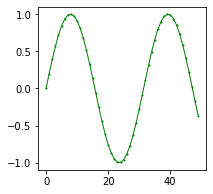

In [6]:
plt.figure(figsize = (3,3))
x = np.arange(50)
y = np.sin(x / 5)
plt.plot(x, y, color='green', marker='o', linestyle='solid', linewidth=1, markersize=1, label='line1')
plt.show()

Вызов еще одной такой же функции добавляет новую кривую на тот же график. Если параметры прорисовки линий не указывать, то они устанавливаются по умолчанию.

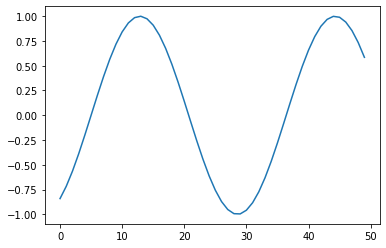

In [7]:
y = np.sin(x / 5 - 1)
plt.plot(x, y)

Функция **title()** устанавливает название графика, функции **xlabel()**, **ylabel()** устанавливают названия осей, функции **xlim()**, **ylim()** - диапазоны осей, **xscale()**, **yscale()** - масштабы осей (линейный, логарифмический). Функция **legend()** размещает легенду к графику в определенном место (за это отвечает параметр *loc*).

No handles with labels found to put in legend.


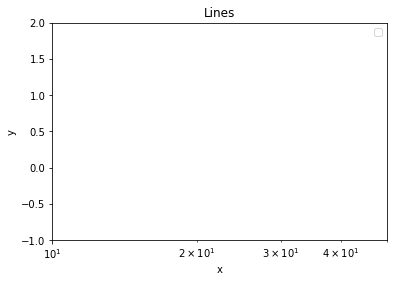

In [8]:
plt.title('Lines')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(10, 50)
plt.ylim(-1, 2)
plt.xscale('log')
plt.legend(loc='best')

### Точечный график

Для построения точечного графика используется функция **plt.scatter(x, y, s=3, c='green', marker='+', cmap, alpha=0.5, label='scatter')**. Аргументы этой функции схожи с аргументами функции **plt.plot()**, но есть отличия. Параметр *s* задает размер маркера, *c* задает цвет, *cmap* обозначает цветовую палитру, в которую в зависимости от значения будут раскрашены точки, *alpha* задает степень прозрачности маркера (1 - непрозрачный, 0 - прозрачный).

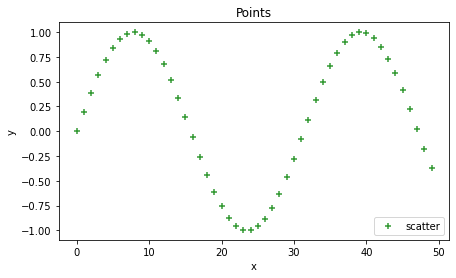

In [9]:
plt.figure(figsize = (7,4))
x = np.arange(50)
y = np.sin(x / 5)
plt.scatter(x, y, s=30, c='green', marker='+', alpha=0.8, label='scatter')
plt.title('Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.show()

### Несколько графиков в одном окне

Предположим, нам надо сравнить несколько различных графиков друг с другом, т.е. расположить их рядом или сгруппировать несколько графиков, чтобы они отображались в одном окне. В этом случае объекту **Figure** будут принадлежать сразу несколько объектов **Axes**. Построить такие графики можно с помощью функции **plt.subplot(nrows, ncol, num)**, *nrows* равен числу колонок в таблице из графиков, *ncol* равен числу столбцов в таблице из графиков, *num* обозначает порядковый номер графика. При этом после выполнения команды **plt.subplot()** "фокус" смещается на текущий график, и все команды, связанные с отображением данных, построения самого графика, оформления его внешнего вида, исполняются для текущего объекта **Axes**. Новая команда **plt.subplot()** с другим *num* делает активным уже другой объект **Axes**.

В примере ниже построим две кривые на соседних графиках.

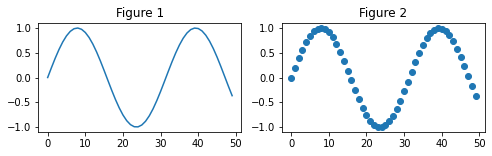

In [10]:
plt.figure(figsize = (8,2))
plt.subplot(1,2,1)
plt.title('Figure 1')
plt.plot(x, y)
plt.subplot(1,2,2)
plt.title('Figure 2')
plt.scatter(x, y)
plt.show()

### Гистограммы

Гистограммы строятся с помощью функции **plt.hist(x, bins, range=(xmin, xmax), histtype, align, orientation, color, label)**. Аргумент *x* содержит последовательность значений, по которым будет строится гистограмма, *range* определяет, в каких интервалах будут выбираться значения, *bins* равен числу столбцов в гистограмме, *color* задает цвета, *label* определеяет метки данных (названия колонок). 

Параметр *histtype* определяет тип гистограммы: *bar* - традиционная гистограмма в виде колонок/столбцов (если данные многомерные, то каждая колонка будет содержать колонки под каждую размерность), *barstacked* - в случае многомерных данных колонки будут друг над другом, *step* - отображается огибающая, *stepfilled* - отображается огибающая с заполнением.

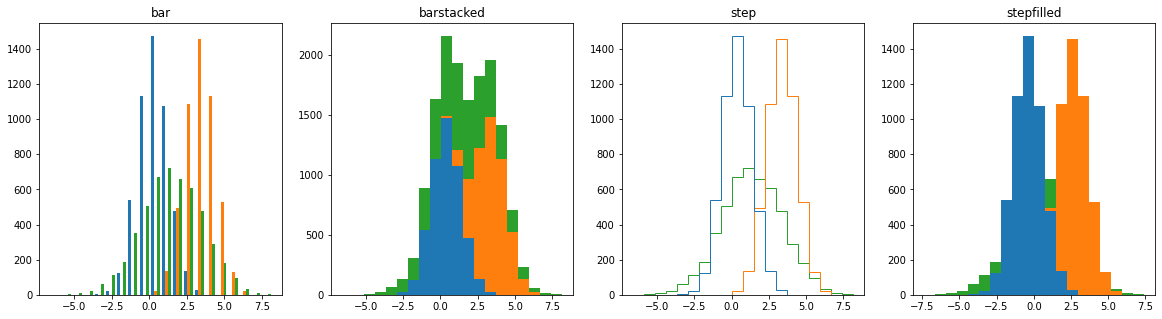

In [11]:
x1 = np.random.normal(loc=0, scale=1, size=5000)
x2 = np.random.normal(loc=3, scale=1, size=5000)
x3 = np.random.normal(loc=1, scale=2, size=5000)

plt.figure(figsize = (20,5))
plt.subplot(1,4,1)
plt.title('bar')
plt.hist([x1,x2,x3], bins=20, histtype='bar', align='right', orientation='vertical')
plt.subplot(1,4,2)
plt.title('barstacked')
plt.hist([x1,x2,x3], bins=20, histtype='barstacked', align='right', orientation='vertical')
plt.subplot(1,4,3)
plt.title('step')
plt.hist([x1,x2,x3], bins=20, histtype='step', align='right', orientation='vertical')
plt.subplot(1,4,4)
plt.title('stepfilled')
plt.hist([x1,x2,x3], bins=20, histtype='stepfilled', align='left', orientation='vertical')
plt.show()

Параметр *align* определяет выравнивание баров относительно колонок. Возможные значения: *left*, *mid*, *right*.

Параметр *orientation* принимает возможные значения *horizontal* и *vertical* и определяет пространственную ориентацию колонок.

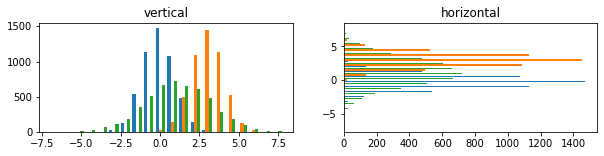

In [12]:
plt.figure(figsize = (10,2))
plt.subplot(1,2,1)
plt.title('vertical')
plt.hist([x1,x2,x3], bins=20, orientation='vertical')
plt.subplot(1,2,2)
plt.title('horizontal')
plt.hist([x1,x2,x3], bins=20, orientation='horizontal')
plt.show()

## Статистический анализ средствами модуля **pandas**

В первой лабораторной работе уже упоминался метод **describe()** классов **Series** и **DataFrame**, позволяющий получать основные статистические величины (среднее значение, стандартное отклонение, медиану и пр.) по каждой из колонок таблицы. Но иногда требуется получить какие-то другие статистические величины, только на части данных, удовлетворяющих определенному условию. Для этого можно использовать непосредственно статистические функции, являющиеся методами этих классов: *max()*, *min()*, *mode()*, *kurt()*, *median()*, *quantile()*, *skew()*, *std()*, *var()*, *diff()*, *corr()*, *autocorr()* и др. Полный список можно найти на [сайте с документацией](https://pandas.pydata.org/docs/reference/frame.html "dataframe").

Для примера создадим объект **DataFrame** c 10 колонками и заполним их равномерно распределенными значениями в интервале \[0, 1\].

In [13]:
import pandas as pd

df = pd.DataFrame(data=np.array([np.random.uniform(size=1000) for _ in range(10)]).T, columns=['Var'+str(i) for i in range(10)])
df.head()

,Var0,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9
0,0.203751,0.244516,0.015243,0.114763,0.344411,0.355733,0.958239,0.211298,0.610305,0.512278
1,0.424188,0.394321,0.751188,0.502343,0.336035,0.940300,0.027032,0.273411,0.246959,0.872319
2,0.481859,0.356699,0.043768,0.458413,0.248409,0.634811,0.165870,0.543763,0.794542,0.903146
3,0.931928,0.187730,0.054445,0.147655,0.298895,0.984929,0.804399,0.689274,0.555659,0.274243
4,0.456083,0.405818,0.466699,0.651915,0.810936,0.893279,0.137293,0.087797,0.240580,0.480035


**DataFrame** имеет встроенные методы для построения графиков. Например, построим точечный график для значений первой колонки по значениям нулевой колонки с помощью метода **plot.scatter()**. Его аргументы аналогичны функции **plt.scatter()**.

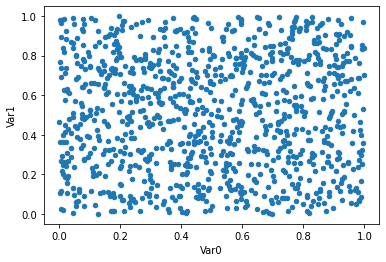

In [14]:
df.plot.scatter('Var0', 'Var1')
plt.show()

С помощью метода **plot.hist()** определим распределение величины *Var3*, а также вычислим среднее и медиану.

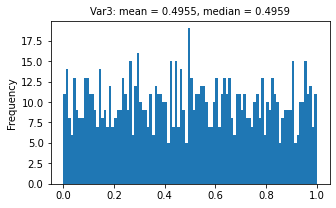

In [15]:
mean_value = df['Var3'].mean()
median_value = df['Var3'].median()

plt.figure(figsize=(5,3))
df['Var3'].plot.hist(bins=100)
plt.title(f'Var3: mean = {median_value:.4}, median = {mean_value:.4}', size=10)
plt.show()

Есть особый тип графиков - *boxplot*, который позволяет наглядно увидеть основные перцентили распределения. Построим такие графики для всех колонок из *df*. 

Средняя линия показывает медиану (50-й перцентиль), верхняя и нижняя границы прямоугольника - 25-й и 75-й перцентиль, верхний и нижний диапазоны - минимальное и максимальное значения соответственно.

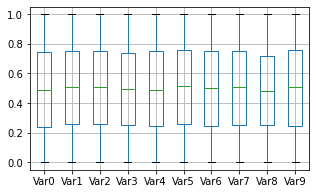

In [16]:
plt.figure(figsize=(5,3))
df.boxplot(column = list(df.columns))
plt.show()

Модуль **matplotlib** позволяет также построить двумерный график двумерной таблицы с помощью функции **matshow()**, при этом значения в таблице будут задавать цвет на двумерном графике. Например, рассчитаем попарную корреляцию Пирсона для всех колонок *df.corr()* и построим двумерный график. 

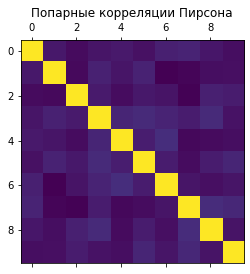

In [17]:
plt.matshow(df.corr())
plt.title('Попарные корреляции Пирсона')
plt.show()

## Задания для самостоятельной работы

1. Постройте на одном графике 4 зависимости: кубическую параболу, корень квадратный, логарифм и сигмоиду. Оформите график таким образом, чтобы разные зависимости визуально четко отличались друг от друга (изменяйте цвет, толщину линии, масштаб графика). Подпишите оси, добавьте легенду.

1. Создайте таблицу, состоящую из 50 колонок и 1000 строк. Каждая колонка должна иметь нормальное распределение с различными средними значениями и стандартными отклонениями.

1. Определите медианы и стандартные отклонения для всех колонок. 

1. Постройте 2 отдельных точечных графика в одном окне: один для медиан, второй для стандартных отклонений. Оформите график так, чтобы он выглядел аккуратно и красиво (выберите подходящий масштаб, размер шрифта, подпишите оси, добавьте названия графиков).

1. Постройте boxplot для любых 10 колонок.

1. Создайте другую таблицу, состоящую из 1000 колонок и 1000 строк. Каждая колонка должна иметь равномерное распределение в интервале от 0 до 1. 

1. Рассчитайте попарную корреляцию Пирсона всех колонок. Определите 4 пары колонок, имеющих наибольшую попарную корреляцию.

1. Постройте линейные графики этих пар в одном окне, так чтобы на каждом графике отображалась одна пара (каждая кривая своим цветом).

1. Сделайте вывод о скоррелированности этих случайных величин.

## 1. Постройте на одном графике 4 зависимости: кубическую параболу, корень квадратный, логарифм и сигмоиду. Оформите график таким образом, чтобы разные зависимости визуально четко отличались друг от друга (изменяйте цвет, толщину линии, масштаб графика). Подпишите оси, добавьте легенду.

/home/amon/.local/lib/python3.8/site-packages/numpy/lib/shape_base.py:379: RuntimeWarning: divide by zero encountered in log10
  res = asanyarray(func1d(inarr_view[ind0], *args, **kwargs))
/home/amon/.local/lib/python3.8/site-packages/numpy/lib/shape_base.py:379: RuntimeWarning: invalid value encountered in log10
  res = asanyarray(func1d(inarr_view[ind0], *args, **kwargs))


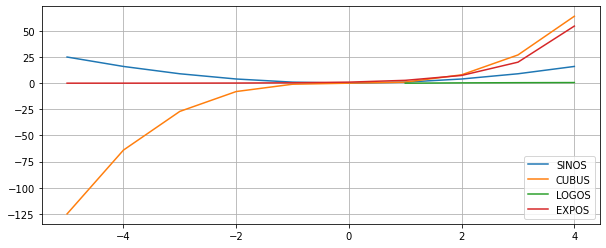

In [30]:
fig, ax = plt.subplots(figsize=(10,4))
x = np.arange(-5,5)
ysin = np.apply_along_axis(lambda x: x**2,0,x)
ycum = np.apply_along_axis(lambda x: x**3,0,x)
ycim = np.apply_along_axis(np.log10,0,x)
ycem = np.apply_along_axis(lambda x: 1/np.exp(-x),0,x)
ax.plot(x,ysin, label='SINOS')
ax.plot(x,ycum, label='CUBUS')
ax.plot(x,ycim, label='LOGOS')
ax.plot(x,ycem, label='EXPOS')
ax.legend(loc="best")
ax.grid(True)


None

## 2. Создайте таблицу, состоящую из 50 колонок и 1000 строк. Каждая колонка должна иметь нормальное распределение с различными средними значениями и стандартными отклонениями.


In [19]:
%%time
df = pd.DataFrame(data=np.array([np.random.normal(loc=int(np.random.random(1)*20),scale=int(np.random.random(1)*25),size=1000) for i in range(50)]).T, columns=['str'+str(i) for i in range(50)])
df.head()

CPU times: user 3.39 ms, sys: 2.78 ms, total: 6.17 ms
Wall time: 5.06 ms


,str0,str1,str2,str3,str4,str5,str6,str7,str8,str9,...,str40,str41,str42,str43,str44,str45,str46,str47,str48,str49
0,16.334079,21.077386,20.058370,8.308984,-0.780591,3.410796,-3.608063,-10.910021,9.263465,11.339320,...,-5.401192,22.236432,1.638250,-2.032636,-7.054463,56.736396,41.328681,-4.581327,14.559312,30.308383
1,13.840777,17.975294,15.391554,6.900833,-1.752077,8.685308,8.079952,-14.173563,14.096953,8.792026,...,5.627208,-8.949641,12.534434,2.610512,-3.658294,-26.034761,5.973805,2.766815,22.609445,15.779011
2,15.132199,19.343444,11.328319,5.936035,-5.024003,10.231145,6.235852,13.290602,-5.215374,0.302566,...,30.997979,14.980836,-17.140549,-12.137140,29.549225,33.237538,22.175860,-2.074954,21.286872,-32.615313
3,11.991457,15.630635,15.240605,2.602276,-26.857175,-13.947604,2.397310,-1.739118,-6.200319,8.065780,...,43.003142,22.880579,-16.310508,-36.580742,-7.245869,6.665575,-20.134313,11.381661,21.730729,-9.629572
4,20.746880,20.136332,3.103583,5.303235,0.399219,-2.648464,-4.426064,14.424797,-11.571291,10.514900,...,8.185562,15.690303,1.191769,2.880681,-38.500312,7.023534,-2.805200,-4.746091,35.470111,0.404644


## 3. Определите медианы и стандартные отклонения для всех колонок. 


In [32]:
data = df.agg([np.median,np.std])
data

,str0,str1,str2,str3,str4,str5,str6,str7,str8,str9,...,str40,str41,str42,str43,str44,str45,str46,str47,str48,str49
median,14.051986,18.102081,12.103146,4.894023,7.874897,8.920392,3.929990,2.260615,1.448115,12.174793,...,0.147628,14.497061,0.515742,0.681613,13.441163,7.249403,-0.879569,8.942759,13.950810,6.931797
std,3.993299,2.037284,7.388646,4.055555,18.316607,18.189584,10.544422,9.728134,13.875384,5.129446,...,18.624737,24.222147,9.297585,19.272616,23.167336,21.475123,17.270349,15.064405,10.894992,22.068812


## 4. Постройте 2 отдельных точечных графика в одном окне: один для медиан, второй для стандартных отклонений. Оформите график так, чтобы он выглядел аккуратно и красиво (выберите подходящий масштаб, размер шрифта, подпишите оси, добавьте названия графиков).


<ipython-input-34-ad0c7129f3d4>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  ax[0].plot(x,data.loc["median"],'b.', label="median", markersize=20, color="blue")
<ipython-input-34-ad0c7129f3d4>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  ax[1].plot(x,data.loc["std"],'b.', label="std", markersize=20, color="green")


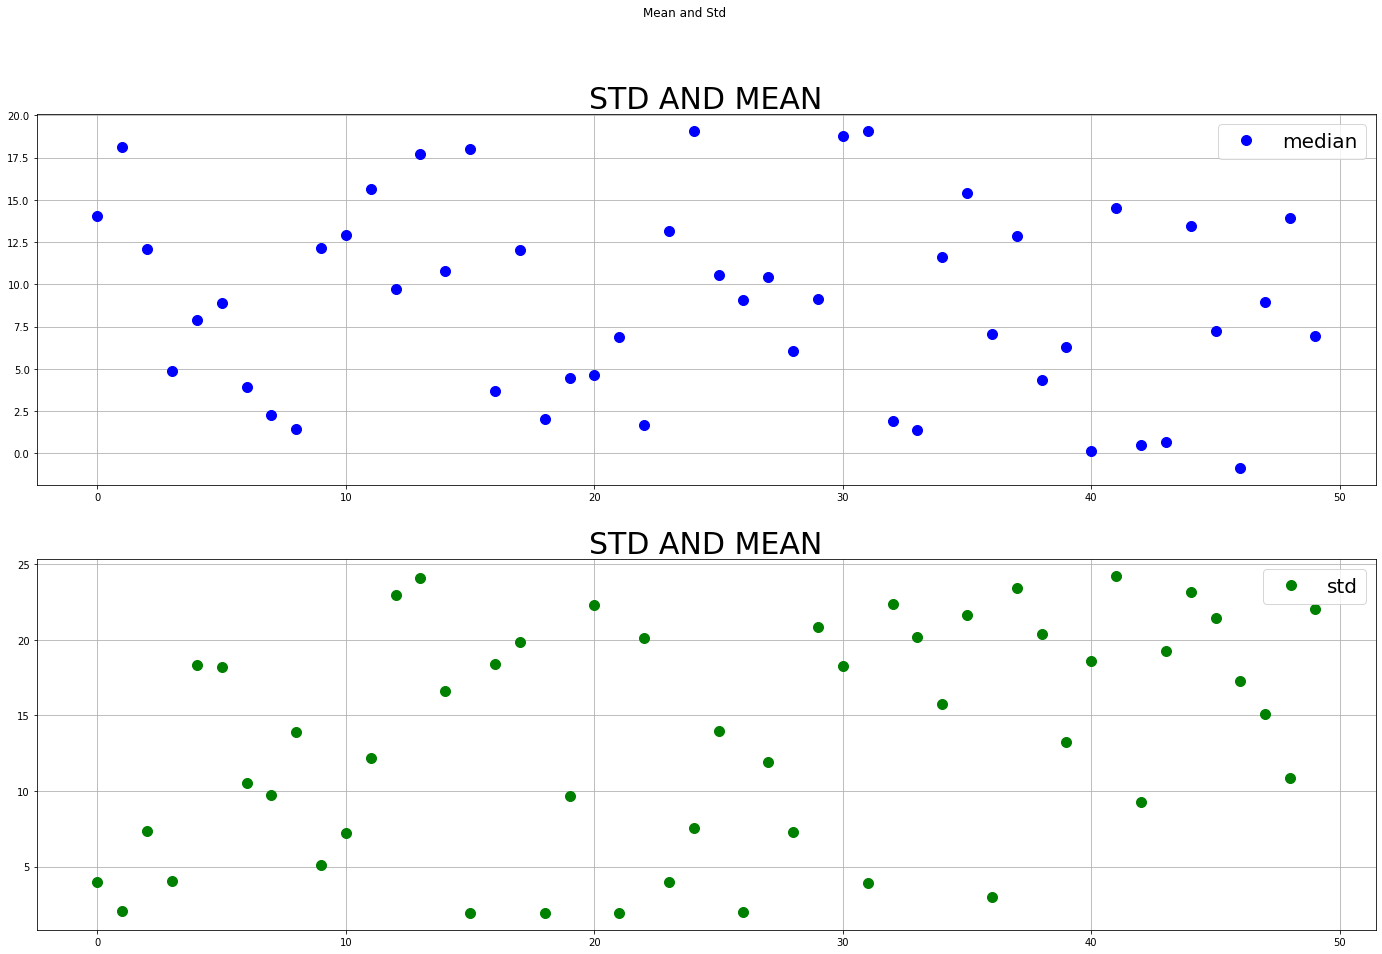

In [34]:
fig, ax = plt.subplots(2,figsize=(24,15))
x = range(0,50)
fig.suptitle("Mean and Std")
ax[0].plot(x,data.loc["median"],'b.', label="median", markersize=20, color="blue")
ax[0].set_title("STD AND MEAN", fontdict={"fontsize":"30"})
ax[0].legend(loc='best', fontsize="20")
ax[0].grid(True)
ax[1].plot(x,data.loc["std"],'b.', label="std", markersize=20, color="green")
ax[1].set_title("STD AND MEAN", fontdict={"fontsize":"30"})
ax[1].legend(loc='best', fontsize="20")
ax[1].grid(True)

## 5. Постройте boxplot для любых 10 колонок.


<AxesSubplot:>

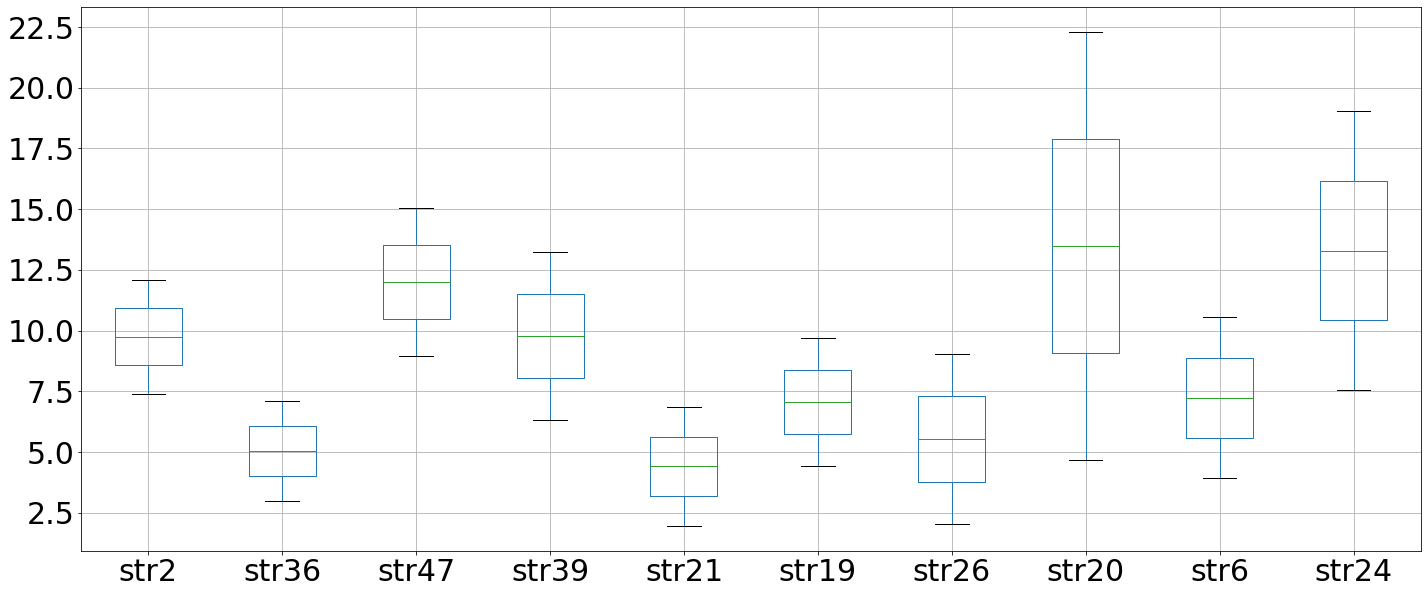

In [35]:
fig, ax = plt.subplots(figsize=(24,10))
ar = np.array(np.random.random(10)*50,dtype=np.int32)
data.iloc[:,ar.tolist()].boxplot(fontsize=30, ax=ax)

## 6. Создайте другую таблицу, состоящую из 1000 колонок и 1000 строк. Каждая колонка должна иметь равномерное распределение в интервале от 0 до 1. 

In [23]:
uniform_data = pd.DataFrame(data=np.array([np.random.uniform(size=1000) for _ in range(1000)]).T, columns=["s" + str(i) for i in range(1000)])
uniform_data.head()

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,...,s990,s991,s992,s993,s994,s995,s996,s997,s998,s999
0,0.636896,0.547697,0.573747,0.323984,0.523522,0.458333,0.548210,0.224046,0.291778,0.432548,...,0.202306,0.833276,0.616432,0.659731,0.643325,0.261580,0.446656,0.133419,0.325000,0.837103
1,0.639979,0.577607,0.457643,0.668264,0.202241,0.661144,0.942647,0.498362,0.362919,0.388468,...,0.402738,0.186627,0.105742,0.726737,0.370637,0.352004,0.961305,0.824390,0.620698,0.521476
2,0.550820,0.385771,0.054636,0.295079,0.685059,0.165185,0.685094,0.938658,0.553564,0.263831,...,0.256599,0.157493,0.590492,0.667989,0.232367,0.220072,0.768286,0.355847,0.831920,0.025144
3,0.024520,0.355145,0.329668,0.024171,0.785437,0.666225,0.110287,0.741099,0.910814,0.576738,...,0.641711,0.084564,0.851142,0.752368,0.556473,0.769210,0.500062,0.090690,0.055107,0.083801
4,0.129000,0.041247,0.150448,0.082003,0.748183,0.660616,0.962470,0.381424,0.314275,0.838446,...,0.641681,0.160644,0.712495,0.325969,0.465815,0.567364,0.724770,0.350339,0.723049,0.495608


## 7. Рассчитайте попарную корреляцию Пирсона всех колонок. Определите 4 пары колонок, имеющих наибольшую попарную корреляцию.


In [24]:
pirson = uniform_data.corr()
 

In [25]:
%%time
pirson[pirson.loc[:,:]==1] = 0
idx = pirson.idxmax().rename("id")
val = pirson.max().rename("val")
new = pd.concat([val,idx], axis=1)
top4 = new.sort_values(by="val",ascending=False).iloc[:8:2,:]
top4

CPU times: user 18.3 ms, sys: 1.03 ms, total: 19.4 ms
Wall time: 17.7 ms


,val,id
s392,0.134175,s51
s373,0.130876,s14
s815,0.130583,s823
s673,0.129914,s815


## 8. Постройте линейные графики этих пар в одном окне, так чтобы на каждом графике отображалась одна пара (каждая кривая своим цветом).


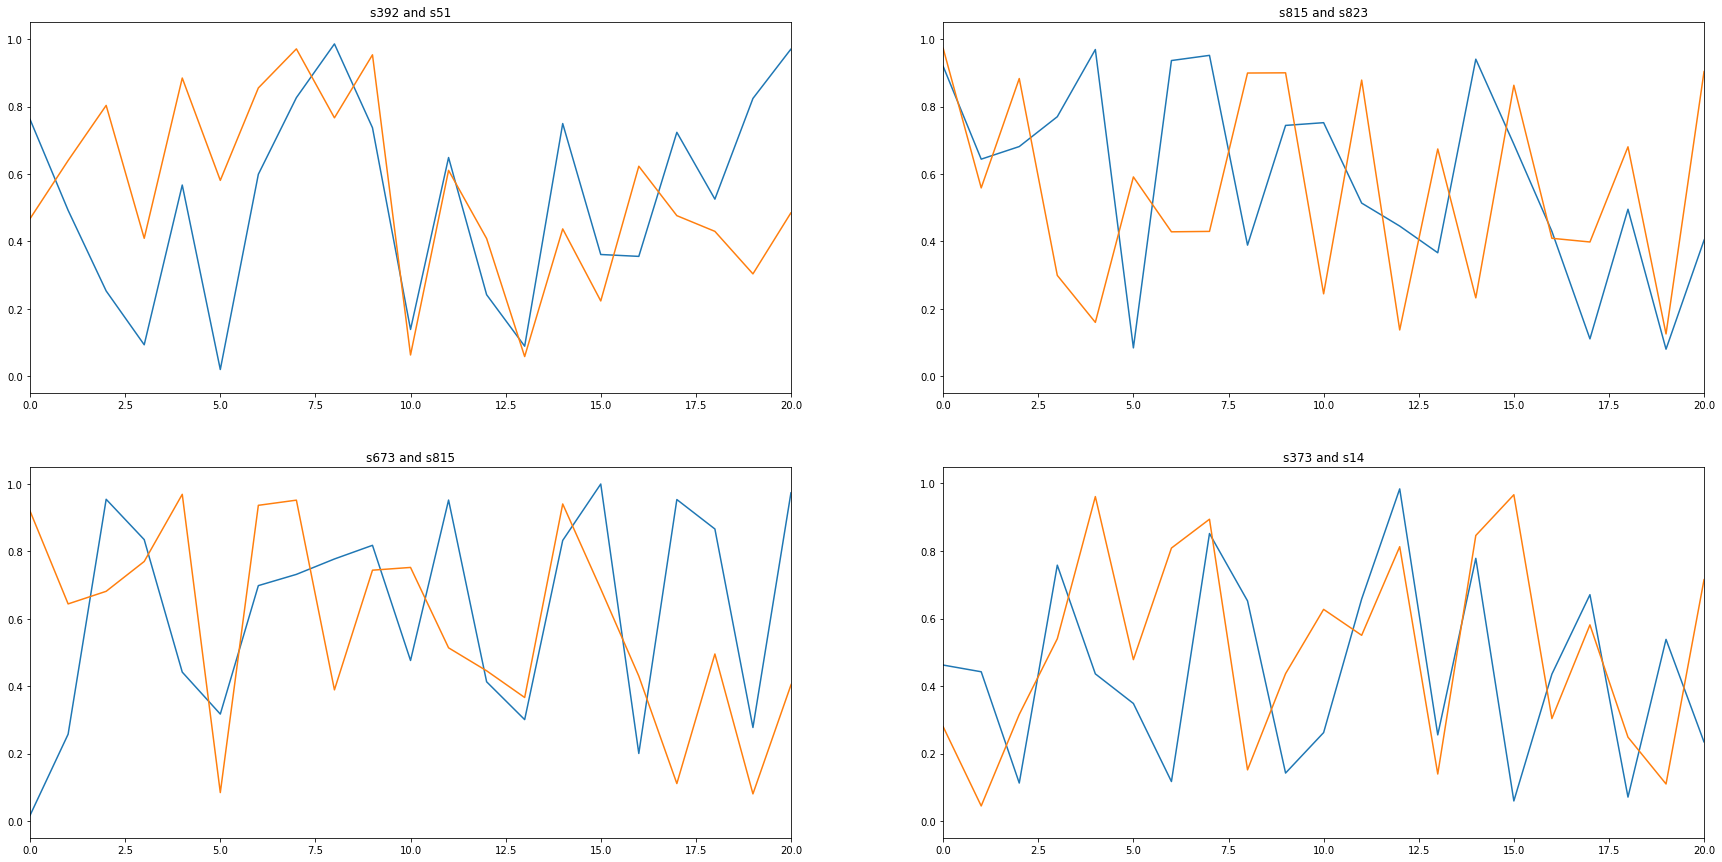

In [36]:
fig,ax = plt.subplots(2,2,figsize=(30,15))
i = 0
j = 0
x = range(1000)
for stri, arr in top4.iterrows():
    ax[i][j].plot(x,uniform_data[stri])
    ax[i][j].plot(x,uniform_data[arr[1]])
    ax[i][j].set_title(stri + " and " + arr[1])
    ax[i][j].set_xlim(0,20)
    i = (i+1)%2
    j = (j + i%2)%2
# не очень понял что тут требется, но вот сделал, как понял...

## 9 Сделайте вывод о скоррелированности этих случайных величин.

Они вообще не скорелированы, это видно как по графикам (если там что-то можно разобрать конечно), так и по значению пирсона 0.15 значит, что значения абсюлютно разные, но было бы интересно поиграться и довести рандом до хотя бы 0.5

## Список литературы

- Модуль **pandas** [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/ "pandas")
- Модуль **matplotlib** [https://matplotlib.org/stable/api/pyplot_summary.html](https://matplotlib.org/stable/api/pyplot_summary.html "matplotlib")